In [43]:
import requests 
import pandas as pd 
import datetime

In [44]:
api_key = 'fb365aa6104829b44455572365ff3b4e'

In [45]:
lat = 18.184135
lon = 74.610764

In [46]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [48]:
temperatures = [item['main']['temp'] for item in weather_data['list']] 

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [49]:
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [50]:
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 304.82
Minimum Temperature - 292.05


In [51]:
weather_df.fillna(0, inplace=True)

In [52]:
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [53]:
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-10 21:00:00        22.33        43        2.88           clear sky
2024-11-11 00:00:00        20.74        50        2.11           clear sky
2024-11-11 03:00:00        23.56        45        2.12           clear sky
2024-11-11 06:00:00        28.43        31        4.08           clear sky
2024-11-11 09:00:00        30.75        25        3.86           clear sky
2024-11-11 12:00:00        28.26        31        4.19           clear sky
2024-11-11 15:00:00        23.96        38        3.94       broken clouds
2024-11-11 18:00:00        22.10        46        2.97       broken clouds
2024-11-11 21:00:00        20.61        53        2.52     overcast clouds
2024-11-12 00:00:00        18.90        63        1.87     overcast clouds
2024-11-12 03:00:00        22.86        51        1.82       broken clouds
2024-11-12 06:00:00      

In [54]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

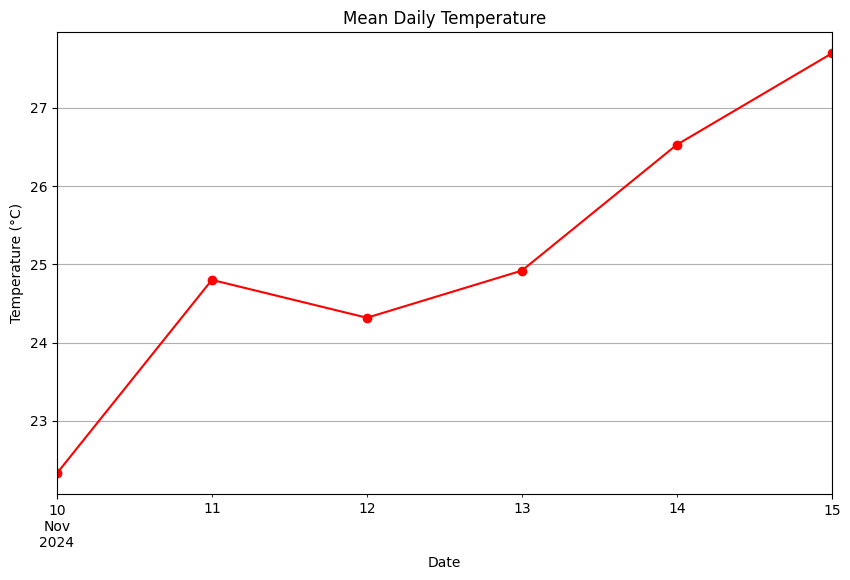

In [55]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

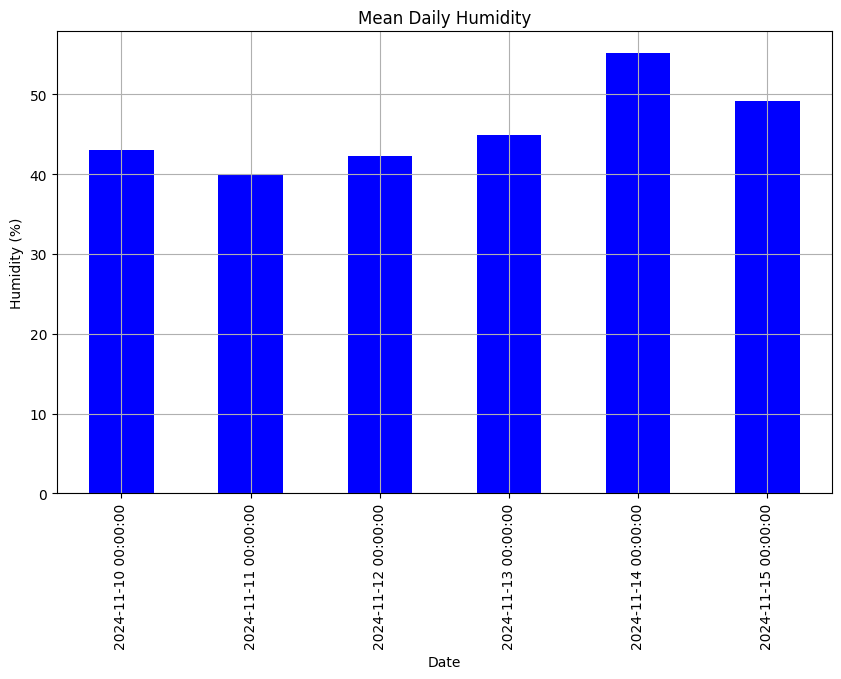

In [56]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

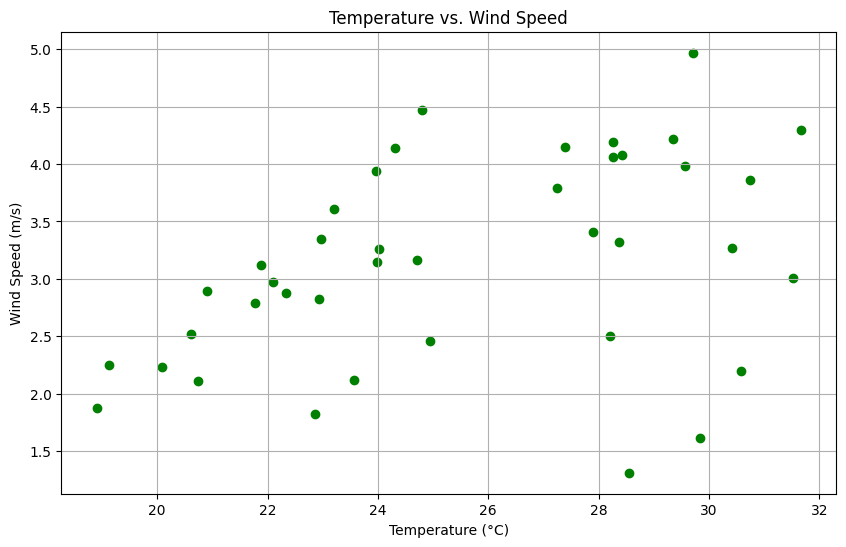

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

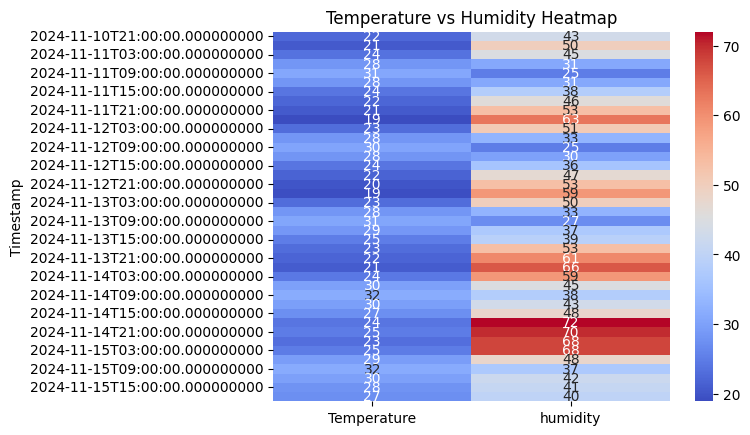

In [58]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

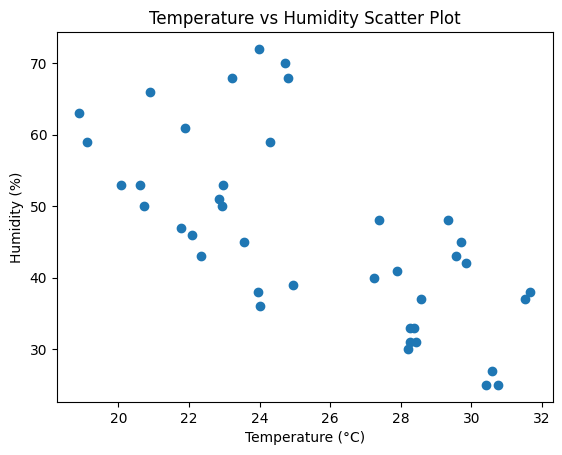

In [59]:
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()